In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import numpy as np

In [3]:
data = pd.read_csv('SpotifyFeatures.csv')
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


In [6]:
data['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [7]:
soul = data.loc[data['genre']=='Soul']
soul.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
191939,Soul,John Legend,All of Me,3U4isOIWM3VvDubwSI3y7a,85,0.922,0.422,269560,0.264,0.000000,G#,0.1320,-7.064,Major,0.0322,119.930,4/4,0.331
191940,Soul,Marvin Gaye,Ain't No Mountain High Enough - Mono,76resiPGue5Cum9rLUKCj0,79,0.290,0.620,148093,0.813,0.000109,B,0.1430,-6.115,Minor,0.0307,129.380,4/4,0.832
191941,Soul,Adele,Someone Like You,4kflIGfjdZJW4ot2ioixTB,79,0.892,0.559,285040,0.330,0.000000,A,0.0975,-8.251,Major,0.0285,135.109,4/4,0.285
191942,Soul,The Temptations,My Girl,6jWkZvd1URGktyTTwcpPpB,79,0.625,0.579,165000,0.419,0.000000,C,0.0981,-10.720,Major,0.0346,104.564,4/4,0.673
191943,Soul,Estelle,American Boy,22UDw8rSfLbUsaAGTXQ4Z8,78,0.171,0.727,284733,0.729,0.000000,C,0.0700,-2.990,Major,0.3260,117.932,4/4,0.512


In [8]:
rock = data.loc[data['genre']=='Rock']
rock.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
152988,Rock,Queen,We Are The Champions,4kzvAGJirpZ9ethvKZdJtg,50,0.230000,0.460,180667,0.482,0.000000,A#,0.1010,-7.413,Major,0.0285,94.975,3/4,0.202
152989,Rock,Death Cab for Cutie,Black Sun,59FC22eN2Syt9bbv2d6393,55,0.170000,0.608,289160,0.642,0.066700,D,0.1660,-7.978,Major,0.0251,87.703,4/4,0.608
152990,Rock,Demon Hunter,On My Side,3zlqFHiuLAUra9MsJ85l4v,59,0.000005,0.480,244387,0.953,0.066700,C#,0.0805,-5.061,Minor,0.0889,95.016,4/4,0.268
152991,Rock,Carole King,Bitter With The Sweet,6bMrfP9V5s5fgL3Z02tcES,64,0.807000,0.691,148040,0.430,0.000508,G#,0.1150,-13.252,Major,0.0576,99.032,4/4,0.690
152992,Rock,Tenth Avenue North,Worn,6jAAYLKxXPyeEoddXu6Gf7,54,0.384000,0.510,244120,0.420,0.000000,F#,0.1020,-8.014,Major,0.0312,125.898,4/4,0.190


In [9]:
pop = data.loc[data['genre']=='Pop']
pop.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107805,Pop,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.1490,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463
107806,Pop,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


In [10]:
joint = soul.append([rock,pop])
joint.duplicated().any()

False

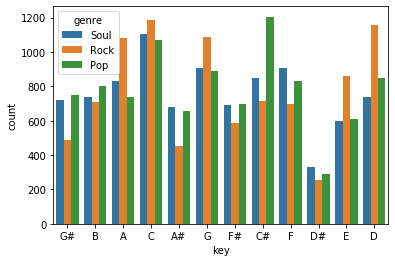

In [11]:
sns.countplot(x=joint['key'],hue=joint['genre'])

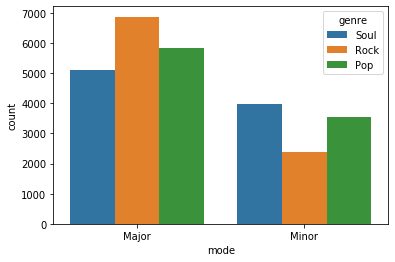

In [12]:
sns.countplot(x=joint['mode'],hue=joint['genre'])

In [13]:
key = pd.crosstab(joint['genre'],joint['key'])
key

key,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
genre,,,,,,,,,,,,
Pop,738,658,802,1067,1205,850,292,610,831,699,887,747
Rock,1081,455,711,1183,716,1157,252,858,697,586,1089,487
Soul,829,678,736,1104,847,736,332,601,906,694,905,721


In [14]:
chi2, p, dof, expected = stat.chi2_contingency(key)
print('The chi-squared value is:',chi2)
print('The p-value is:',p)


The chi-squared value is: 572.6155045580972
The p-value is: 4.8092203786223304e-107


In [15]:
mode = pd.crosstab(joint['genre'],joint['mode'])
mode

mode,Major,Minor
genre,,
Pop,5843,3543
Rock,6878,2394
Soul,5107,3982


In [16]:
chi2, p, dof, expected = stat.chi2_contingency(mode)
print('The chi-squared value is:',chi2)
print('The p-value is:',p)

The chi-squared value is: 671.5250638816794
The p-value is: 1.5142066467527798e-146


In [17]:
km = pd.crosstab(joint['key'],joint['mode'])
km

mode,Major,Minor
key,,
A,1655,993
A#,924,867
B,1031,1218
C,2676,678
C#,1798,970
D,2169,574
D#,559,317
E,1070,999
F,1331,1103


In [18]:
chi2, p, dof, expected = stat.chi2_contingency(km)
print('The chi-squared value is:',chi2)
print('The p-value is:',p)

The chi-squared value is: 1622.2278331840193
The p-value is: 0.0


In [19]:
dig = joint.replace({'Soul':0,
                     'Rock':1,
                     'Pop':2
})

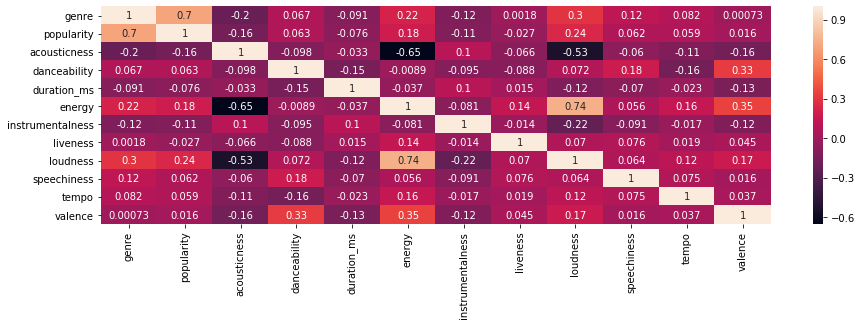

In [20]:
plt.figure(figsize=(15,4))
sns.heatmap(dig.corr(),annot=True)

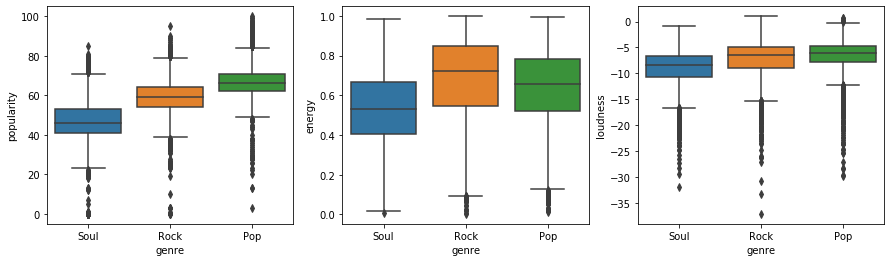

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.boxplot(x=joint['genre'],y=joint['popularity'])
plt.subplot(132)
sns.boxplot(x=joint['genre'],y=joint['energy'])
plt.subplot(133)
sns.boxplot(x=joint['genre'],y=joint['loudness'])

In [22]:
statistic, pvalue = stat.f_oneway(soul['popularity'],rock['popularity'],pop['popularity'])
print('The F-value is:',statistic)
print('The p-value is:',pvalue)

The F-value is: 14062.274715942513
The p-value is: 0.0


In [23]:
statistic, pvalue = stat.f_oneway(soul['energy'],rock['energy'],pop['energy'])
print('The F-value is:',statistic)
print('The p-value is:',pvalue)

The F-value is: 1543.2277506209987
The p-value is: 0.0


In [24]:
statistic, pvalue = stat.f_oneway(soul['loudness'],rock['loudness'],pop['loudness'])
print('The F-value is:',statistic)
print('The p-value is:',pvalue)

The F-value is: 1387.0632892029012
The p-value is: 0.0


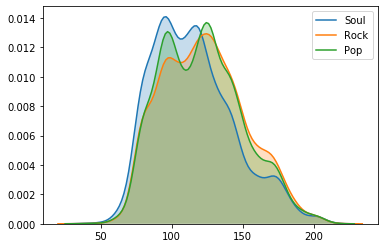

In [25]:
sns.kdeplot(soul['tempo'],shade=True,label='Soul')
sns.kdeplot(rock['tempo'],shade=True,label='Rock')
sns.kdeplot(pop['tempo'],shade=True,label='Pop')

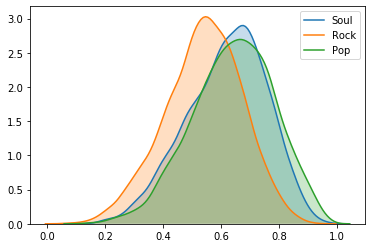

In [26]:
sns.kdeplot(soul['danceability'],shade=True,label='Soul')
sns.kdeplot(rock['danceability'],shade=True,label='Rock')
sns.kdeplot(pop['danceability'],shade=True,label='Pop')

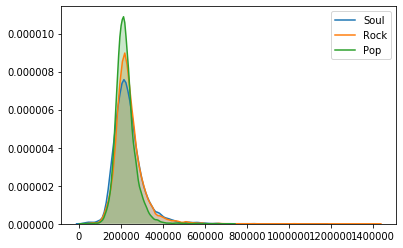

In [27]:
sns.kdeplot(soul['duration_ms'],shade=True,label='Soul')
sns.kdeplot(rock['duration_ms'],shade=True,label='Rock')
sns.kdeplot(pop['duration_ms'],shade=True,label='Pop')

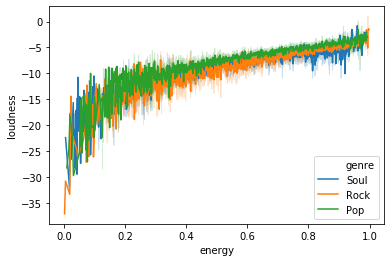

In [28]:
sns.lineplot(x=joint['energy'],y=joint['loudness'],hue=joint['genre'])

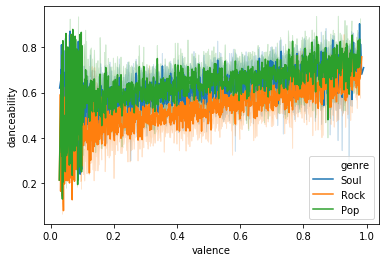

In [29]:
sns.lineplot(x=joint['valence'],y=joint['danceability'],hue=joint['genre'])

In [30]:
f1 = dig[['genre','popularity','key','mode']]

In [31]:
f1 = f1.replace({'C':0,
                 'C#':1,
                 'D':2,
                 'D#':3,
                 'E':4,
                 'F':5,
                 'F#':6,
                 'G':7,
                 'G#':8,
                 'A':9,
                 'A#':10,
                 'B':11,
                 'Major':0,
                 'Minor':1})
f1.head()

,genre,popularity,key,mode
191939,0,85,8,0
191940,0,79,11,1
191941,0,79,9,0
191942,0,79,0,0
191943,0,78,0,0


In [32]:
f1.to_csv('features1.csv')

In [44]:
f2 = dig[['genre','popularity','key','mode','energy','loudness','danceability','valence','tempo']]
f2 = f2.replace({'C':0,
                 'C#':1,
                 'D':2,
                 'D#':3,
                 'E':4,
                 'F':5,
                 'F#':6,
                 'G':7,
                 'G#':8,
                 'A':9,
                 'A#':10,
                 'B':11,
                 'Major':0,
                 'Minor':1})
f2.head()

,genre,popularity,key,mode,energy,loudness,danceability,valence,tempo
191939,0,85,8,0,0.264,-7.064,0.422,0.331,119.930
191940,0,79,11,1,0.813,-6.115,0.620,0.832,129.380
191941,0,79,9,0,0.330,-8.251,0.559,0.285,135.109
191942,0,79,0,0,0.419,-10.720,0.579,0.673,104.564
191943,0,78,0,0,0.729,-2.990,0.727,0.512,117.932


In [45]:
f2.to_csv('features2.csv')